In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
max_features=10000
maxlen = 500
embedding_dim = 32
batch_size = 128
epochs = 10

In [30]:
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
# Load imdb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features )

In [5]:
from keras.preprocessing.sequence import pad_sequences

In [6]:
# Pad to maxlen words

x_train = pad_sequences(x_train, maxlen)
x_test = pad_sequences(x_test, maxlen)

## RNN

In [8]:
# Create RNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [8]:
model = Sequential()
model.add( Embedding( max_features, embedding_dim, input_length=maxlen) )
model.add( SimpleRNN(32) )
model.add( Dense(1, activation='sigmoid') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile('rmsprop', 'binary_crossentropy', ['accuracy'])
history = model.fit(x_train, y_train,
                   batch_size,
                   epochs,
                   validation_split=0.2)
model.save_weights('simple-rnn-imdb.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.6418 - acc: 0.6132 - val_loss: 0.5336 - val_acc: 0.7402
Epoch 2/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.4098 - acc: 0.8250 - val_loss: 0.3824 - val_acc: 0.8392
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2989 - acc: 0.8803 - val_loss: 0.3830 - val_acc: 0.8348
Epoch 4/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2288 - acc: 0.9114 - val_loss: 0.3802 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1678 - acc: 0.9378 - val_loss: 0.4987 - val_acc: 0.8398
Epoch 6/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1173 - acc: 0.9606 - val_loss: 0.4478 - val_acc: 0.8196
Epoch 7/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0767 - acc: 0.9762 - val_loss: 0.4860 - val_acc:

In [11]:
# Plots
hist = history.history
train_acc = hist['acc']
train_loss = hist['loss']
val_acc = hist['val_acc']
val_loss = hist['val_loss']

epochs = history.epoch

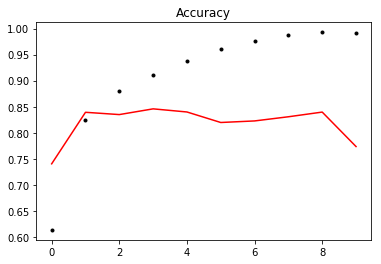

In [12]:
plt.figure()
plt.plot(epochs, train_acc, 'k.', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Accuracy')
plt.show()

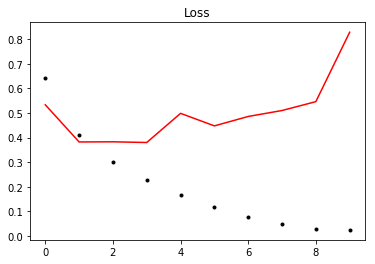

In [13]:
plt.figure()
plt.plot(epochs, train_loss, 'k.', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Loss')
plt.show()

## LSTM

In [14]:
from keras.layers import LSTM

In [15]:
lstm_model = Sequential()
lstm_model.add( Embedding( max_features, embedding_dim, input_length=maxlen ) )
lstm_model.add( LSTM(32) )
lstm_model.add( Dense(1, activation='sigmoid') )
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
lstm_model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(x_train, y_train,
                             batch_size=512, epochs=10,
                             validation_split=0.2 )
lstm_model.save_weights('lstm-imdb.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.6252 - acc: 0.6695 - val_loss: 0.4784 - val_acc: 0.8002
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.4356 - acc: 0.8266 - val_loss: 0.3755 - val_acc: 0.8612
Epoch 3/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.3302 - acc: 0.8728 - val_loss: 0.7901 - val_acc: 0.7520
Epoch 4/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2848 - acc: 0.8945 - val_loss: 0.3095 - val_acc: 0.8766
Epoch 5/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2470 - acc: 0.9090 - val_loss: 0.3067 - val_acc: 0.8718
Epoch 6/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2203 - acc: 0.9201 - val_loss: 0.3523 - val_acc: 0.8420
Epoch 7/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.1938 - acc: 0.9302 - val_loss: 0.2840 - val_acc:

In [18]:
hist = lstm_history.history
train_acc = hist['acc']
train_loss = hist['loss']
val_acc = hist['val_acc']
val_loss = hist['val_loss']

epochs = lstm_history.epoch

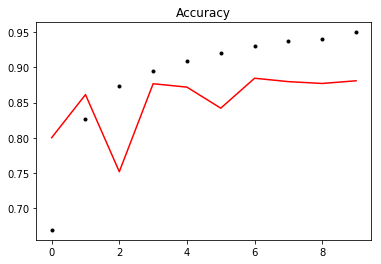

In [19]:
plt.figure()
plt.plot(epochs, train_acc, 'k.', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Accuracy')
plt.show()

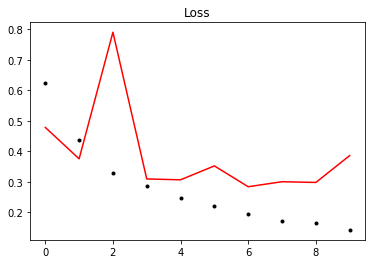

In [20]:
plt.figure()
plt.plot(epochs, train_loss, 'k.', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Loss')
plt.show()

#### 1D CNN

In [26]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop

In [27]:
cnn_model = Sequential()
cnn_model.add( Embedding( max_features, 128, input_length=maxlen) )
cnn_model.add( Conv1D(32, 7, activation='relu') )
cnn_model.add( MaxPooling1D(5) )
cnn_model.add( Conv1D(32, 7, activation='relu') )
cnn_model.add( GlobalMaxPooling1D() )
cnn_model.add( Dense(1, activation='sigmoid') )
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [28]:
cnn_model.compile( RMSprop(lr=1e-4), 'binary_crossentropy', ['acc'] )
cnn_history = cnn_model.fit(x_train, y_train, 
                           batch_size=batch_size, 
                           epochs=epochs,
                           validation_split=0.2
                           )
cnn_model.save_weights('models/cnn-imdb.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.6921 - acc: 0.5258 - val_loss: 0.6903 - val_acc: 0.5964
Epoch 2/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.6844 - acc: 0.6955 - val_loss: 0.6833 - val_acc: 0.6626
Epoch 3/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.6668 - acc: 0.7573 - val_loss: 0.6540 - val_acc: 0.7430
Epoch 4/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.6084 - acc: 0.7990 - val_loss: 0.5620 - val_acc: 0.8088
Epoch 5/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.4898 - acc: 0.8315 - val_loss: 0.4394 - val_acc: 0.8372
Epoch 6/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.3780 - acc: 0.8589 - val_loss: 0.3713 - val_acc: 0.8480
Epoch 7/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.3149 - acc: 0.8780 - val_loss: 0.3397 - val_acc:

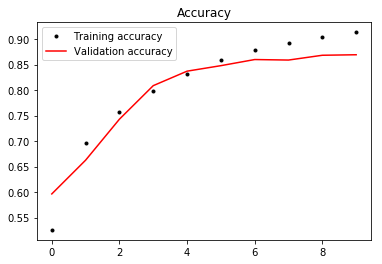

In [31]:
hist = cnn_history.history
epochs = cnn_history.epoch

train_acc = hist['acc']
train_loss = hist['loss']
val_acc = hist['val_acc']
val_loss = hist['val_loss']

plt.figure()
plt.plot(epochs, train_acc, 'k.', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()